In [25]:
import torch
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
sns.set_style("darkgrid")

In [12]:
outputs_finetuned = torch.load("outputs/mnli/mnli_trained.pt").numpy()
outputs_pretrained = torch.load("outputs/mnli/mnli.pt").numpy()

In [13]:
print(outputs_finetuned.shape, outputs_pretrained.shape)

(2141, 768) (2141, 768)


In [14]:
pca = PCA(
    n_components=2,
)

In [15]:
x_pretrained = pca.fit_transform(outputs_pretrained)
x_finetuned = pca.fit_transform(outputs_finetuned)
print(x_pretrained.shape, x_finetuned.shape)

(2141, 2) (2141, 2)


In [18]:
model = ["finetuned"]*outputs_finetuned.shape[0]+["pretrained"]*outputs_pretrained.shape[0]

In [21]:
x = np.vstack((x_finetuned, x_pretrained))
print(x.shape)

(4282, 2)


In [36]:
df = pd.DataFrame(
    data={
        "x_0":x[:, 0],
        "x_1":x[:, 1],
        "model":model,
    }
)

In [37]:
df.shape

(4282, 3)

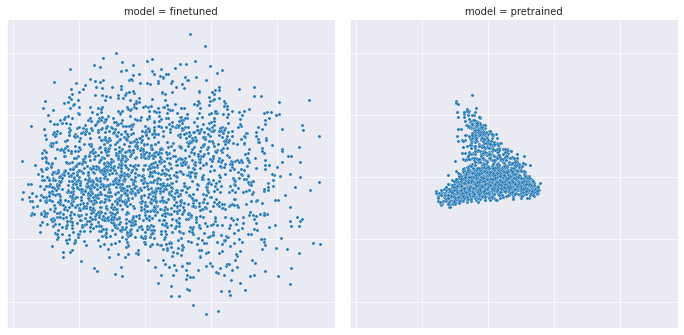

In [52]:
ax = sns.relplot(
    data=df, x="x_0", y="x_1",
    col="model",
    kind="scatter",
    # col="model"
    s=10,
    # color=".1", marker="+"
)
ax.set_xlabels("")
ax.set_ylabels("")

ax.set(xticklabels=[])
ax.set(yticklabels=[])

In [49]:
sns.relplot?

Signature:
sns.relplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=None,
    dashes=None,
    style_order=None,
    legend='auto',
    kind='scatter',
    height=5,
    aspect=1,
    facet_kws=None,
    units=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The ``kind`` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with ``kind="scatter"``; the default)
- :func:`lineplot` (with ``kind="line"``)

Extra keyword arguments are passed to the underlying function, so you
should refer to the d